1. Analyze
2. Preprocess data 
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [59]:
df = pd.read_csv("credit_fraud.csv")
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [47]:
data = df.iloc[:,0:df.shape[1] - 1]
target = df.iloc[:,df.shape[1] - 1]
data.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

## Data Analysis

In [10]:
data.select_dtypes(include=[np.number]).head()

,Unnamed: 0,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,0,5008806,0,112500.0,1,0,0,0,2.0,29,59,3
1,1,5008808,0,270000.0,1,0,1,1,1.0,4,52,8
2,2,5008809,0,270000.0,1,0,1,1,1.0,26,52,8
3,3,5008810,0,270000.0,1,0,1,1,1.0,26,52,8
4,4,5008811,0,270000.0,1,0,1,1,1.0,38,52,8


In [12]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25134.0,1.256650e+04,7255.705169,0.0,6283.25,12566.5,18849.75,25133.0
ID,25134.0,5.078838e+06,41941.018788,5008806.0,5042228.25,5079004.0,5115603.75,5150487.0
NO_OF_CHILD,25134.0,5.123339e-01,0.787785,0.0,0.00,0.0,1.00,19.0
INCOME,25134.0,1.948339e+05,104510.987243,27000.0,135000.00,180000.0,225000.00,1575000.0
FLAG_MOBIL,25134.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
WORK_PHONE,25134.0,2.738124e-01,0.445923,0.0,0.00,0.0,1.00,1.0
PHONE,25134.0,2.927906e-01,0.455052,0.0,0.00,0.0,1.00,1.0
E_MAIL,25134.0,1.006605e-01,0.300885,0.0,0.00,0.0,0.00,1.0
FAMILY SIZE,25134.0,2.294064e+00,0.947590,1.0,2.00,2.0,3.00,20.0
BEGIN_MONTH,25134.0,2.612059e+01,16.439658,0.0,12.00,24.0,39.00,60.0


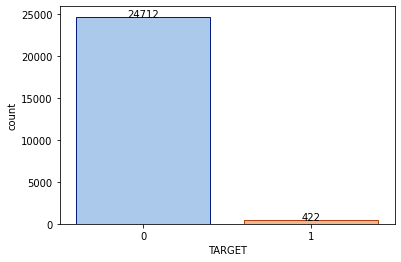

In [27]:
ax = sns.countplot(data=df,x="TARGET",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height+0.5,'{:.0f}'.format(height), ha="center")

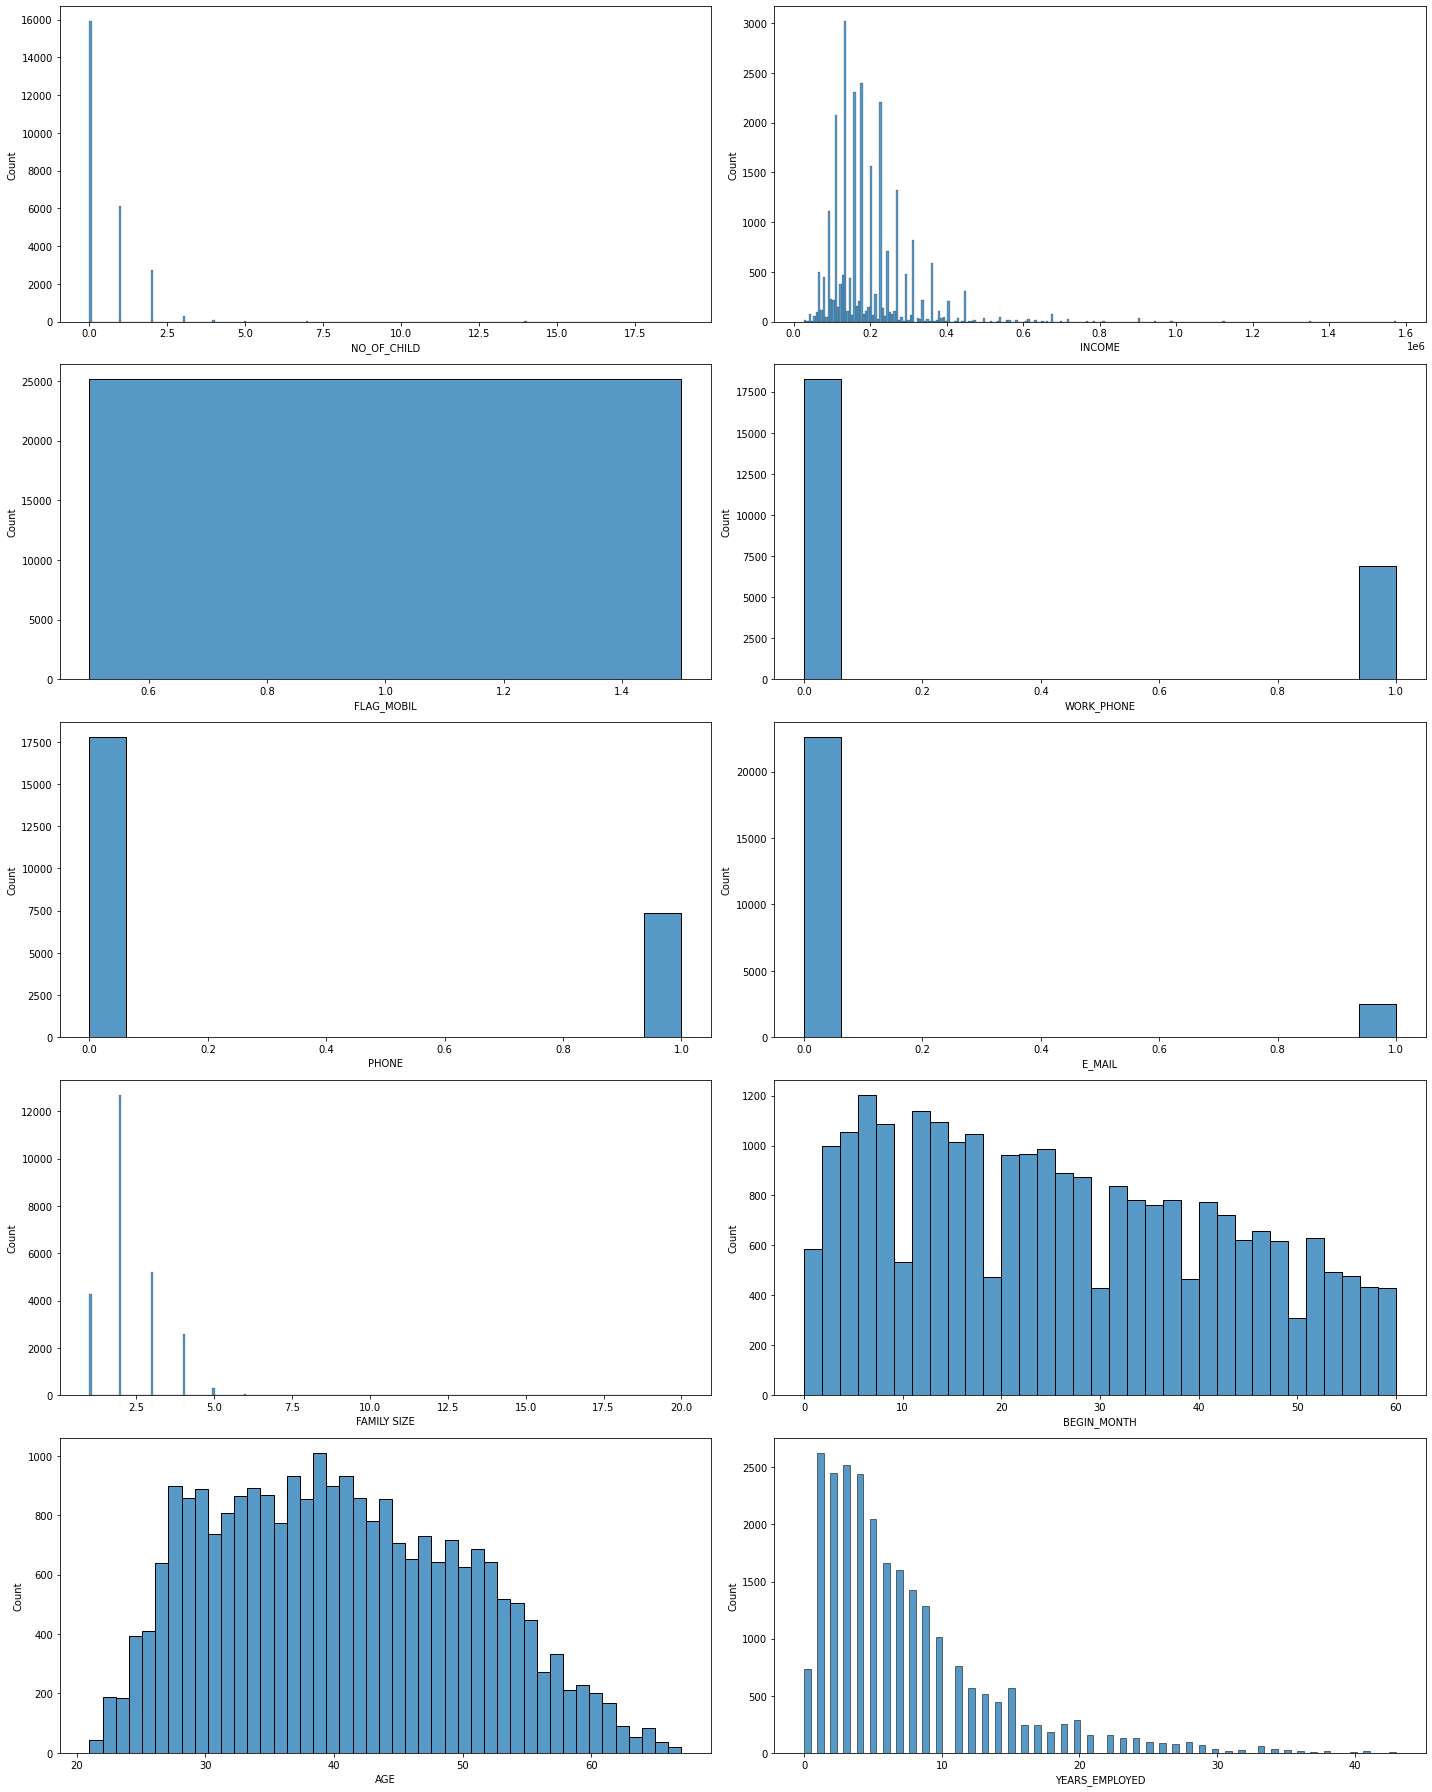

In [23]:
df_num = data.drop(["Unnamed: 0", "ID"],axis = 1).select_dtypes(include=np.number)
fig,ax= plt.subplots(nrows=5,ncols=2,figsize=(20, 25)) 
for variable, subplot in zip(df_num.columns,ax.flatten()):
    z = sns.histplot(data = data, x = df_num[variable],ax=subplot, ) 
plt.tight_layout()

In [13]:
data.select_dtypes(include=['object']).head()

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
0,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment
1,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment
2,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment
4,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment


In [14]:
data.describe(include='object').T

,count,unique,top,freq
GENDER,25134,2,F,15630
CAR,25134,2,N,14618
REALITY,25134,2,Y,16461
INCOME_TYPE,25134,5,Working,15622
EDUCATION_TYPE,25134,5,Secondary / secondary special,16808
FAMILY_TYPE,25134,5,Married,17509
HOUSE_TYPE,25134,6,House / apartment,22102


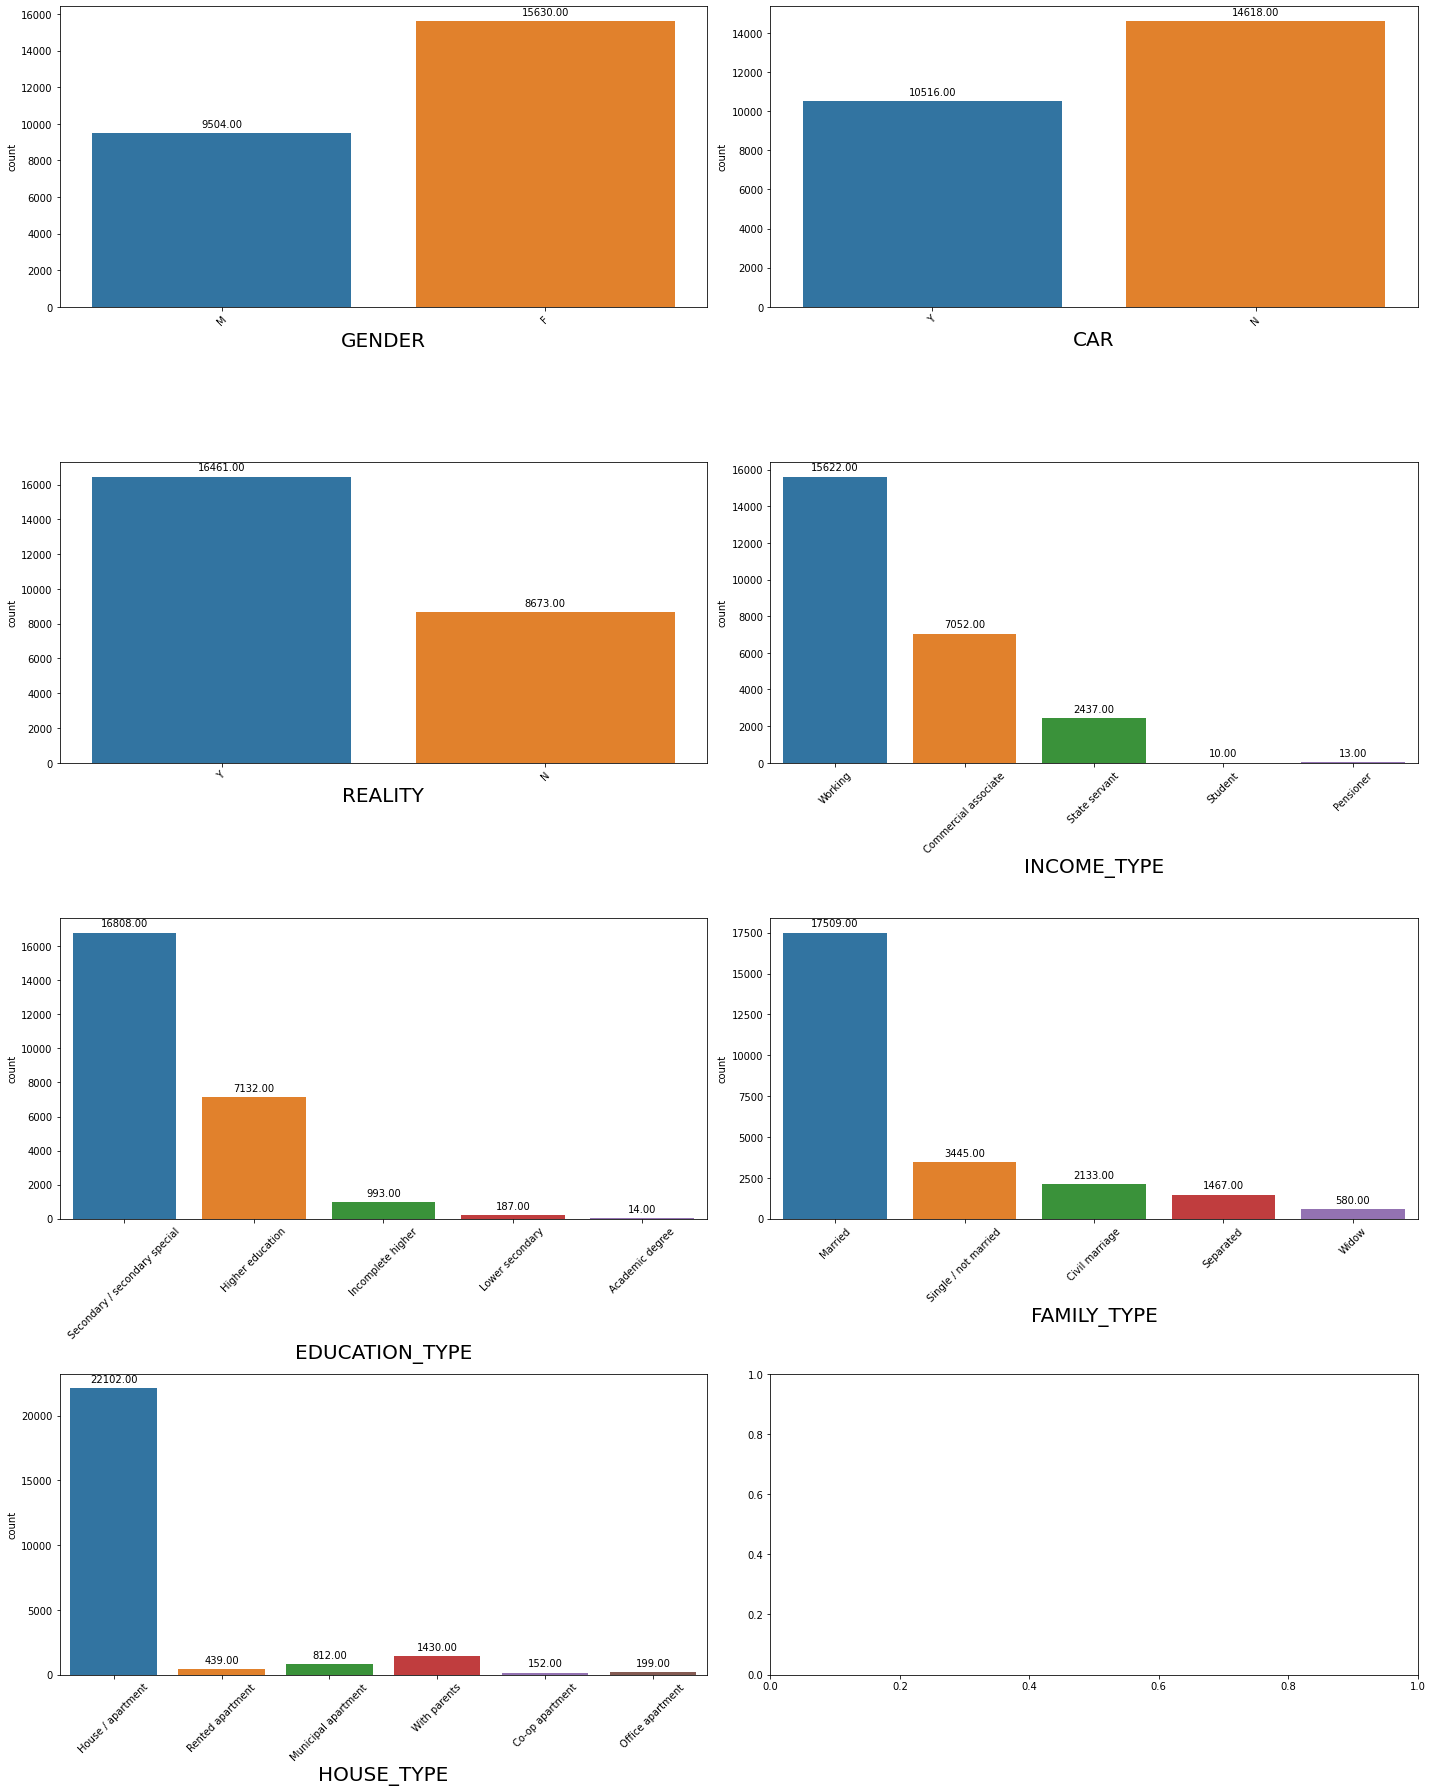

In [17]:
df_cat = df.select_dtypes(include='object')
fig,ax= plt.subplots(nrows=4,ncols=2,figsize=(20, 25)) 
for variable, subplot in zip(df_cat.columns,ax.flatten()):
    z = sns.countplot(x = df_cat[variable],ax=subplot, ) 
    z.set_xlabel(variable, fontsize = 20)
    z.set_xticklabels(z.get_xticklabels(),rotation=45)
    for p in z.patches:
        z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

In [18]:
missing_values = pd.DataFrame({
    'missing_values':df.isnull().sum(),
    'percentage':df.isnull().sum()*100/df.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
Unnamed: 0,0,0.0
ID,0,0.0
YEARS_EMPLOYED,0,0.0
AGE,0,0.0
BEGIN_MONTH,0,0.0
FAMILY SIZE,0,0.0
E_MAIL,0,0.0
PHONE,0,0.0
WORK_PHONE,0,0.0
FLAG_MOBIL,0,0.0


## Preprocessing

In [60]:
def preprocessing_data(df):
    to_drop = ['Unnamed: 0', 'ID', 'FLAG_MOBIL']
    df.drop(to_drop, axis=1, inplace=True)
    return df

In [61]:
df = preprocessing_data(df.copy())
df.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,38,52,8,0


## Feature Engineering

In [62]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    df['GENDER'] = [0 if x == 'M' else 1 for x in df['GENDER']]
    df['CAR'] = [1 if x == 'Y' else 0 for x in df['CAR']]
    df['REALITY'] = [1 if x == 'Y' else 0 for x in df['REALITY']]
    ordinal_col = df.select_dtypes(include = [np.object_]).columns
    label = LabelEncoder()
    for column in ordinal_col:
        df[column] = label.fit_transform(df[column])
    return df

df = apply_feature_engineering(df)

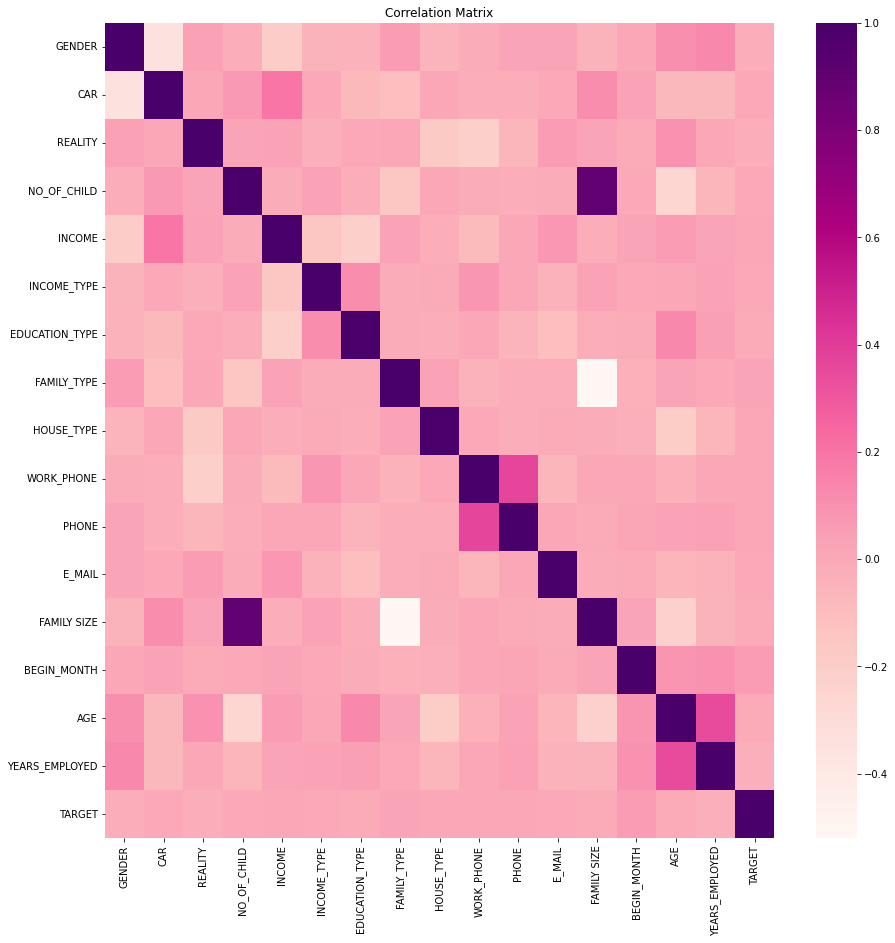

In [51]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='RdPu')
plt.title('Correlation Matrix')
plt.show()

In [52]:
df.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,1,1,0,112500.0,4,4,1,1,0,0,0,2.0,29,59,3,0
1,1,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,4,52,8,0
2,1,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,26,52,8,0
3,1,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,26,52,8,0
4,1,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,38,52,8,0


In [63]:
def prepare_X_y(df):
    
    y = df['TARGET'].values
    X = df.drop('TARGET', axis = 1).values
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [65]:
smote = SMOTE()
X_sample, y_sample = smote.fit_resample(X_train, y_train.ravel())
# checking the sizes of the sample data
print("Size of x-sample :", X_sample.shape)
print("Size of y-sample :", y_sample.shape)
     

Size of x-sample : (37068, 16)
Size of y-sample : (37068,)


In [64]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2007
TRAIN_SIZE = 0.75
X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18850, 16)
(18850,)
(6284, 16)
(6284,)


## Build SK-learn model

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    precision_recall_f1score_train = precision_recall_fscore_support(trainY, y_train_pred, average='macro')
    precision_recall_f1score = precision_recall_fscore_support(testY, y_pred, average='macro')
    accuracy_train = accuracy_score(trainY, y_train_pred)
    accuracy = accuracy_score(testY, y_pred)

    scores = {"train_set": {"Accuracy" : accuracy_train,
                            "Precision" : precision_recall_f1score_train[0],
                            "Recall" : precision_recall_f1score_train[1],                          
                            "f1" : precision_recall_f1score_train[2]},
    
              "test_set": {"Accuracy" : accuracy,
                           "Precision" : precision_recall_f1score[0],
                           "Recall" : precision_recall_f1score[1],                          
                           "f1" : precision_recall_f1score[2]}}
    
    return pd.DataFrame(scores)

In [ ]:
svm = SVC()
pipe = Pipeline(steps=[("scaler", StandardScaler()),("svm", svm)]) #Build a pipeline with a scaler and a model

param_grid = {"svm__C": [0.01, 0.1, 1, 10, 100, 1000],
              "svm__gamma": ["scale", 0.001, 0.005, 0.1]}

search = GridSearchCV(pipe, param_grid, scoring="f1", cv = 10, n_jobs=2)
search.fit(X_sample, y_sample)
print(classification_report(y_test, search.predict(X_test)))

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "6. " \
           "Other conclusion: "